# Additional

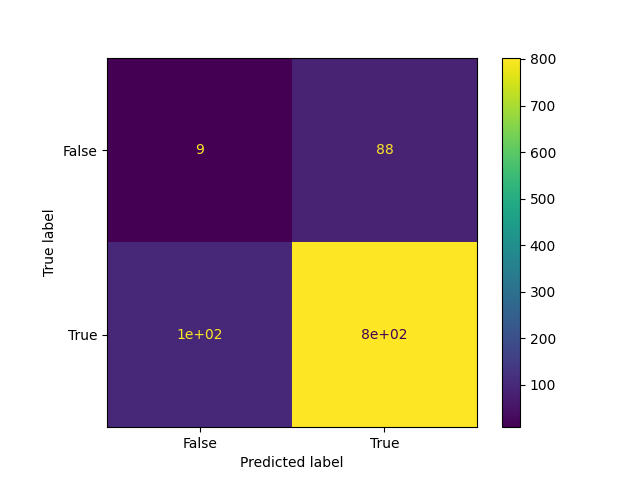

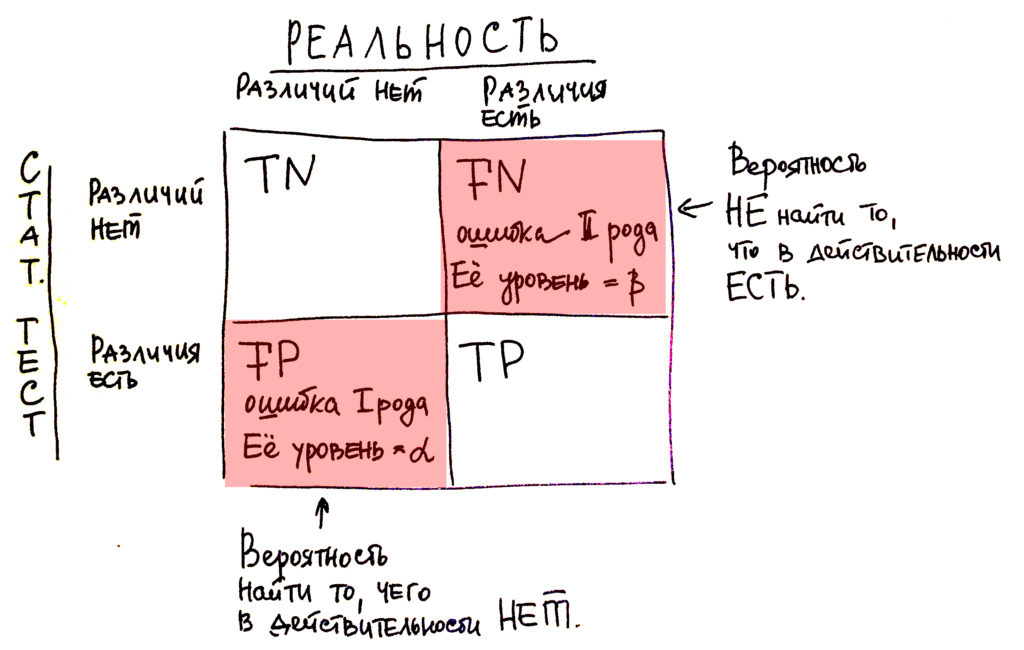

http://www.myshared.ru/slide/1373941/

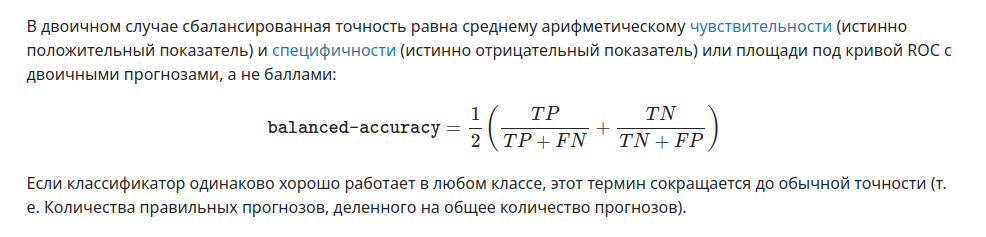

# Setup dataset

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
columns = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv(url, names=columns)


dataset.drop(dataset[dataset[columns[4]] == "Iris-versicolor"].index, inplace=True)

# Models & Learning

### Creating train & test values

In [ ]:
from sklearn.model_selection import train_test_split

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

### Scaling 

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Train & Test plot

Text(0.5, 0.98, 'X_Train scatter matrix')

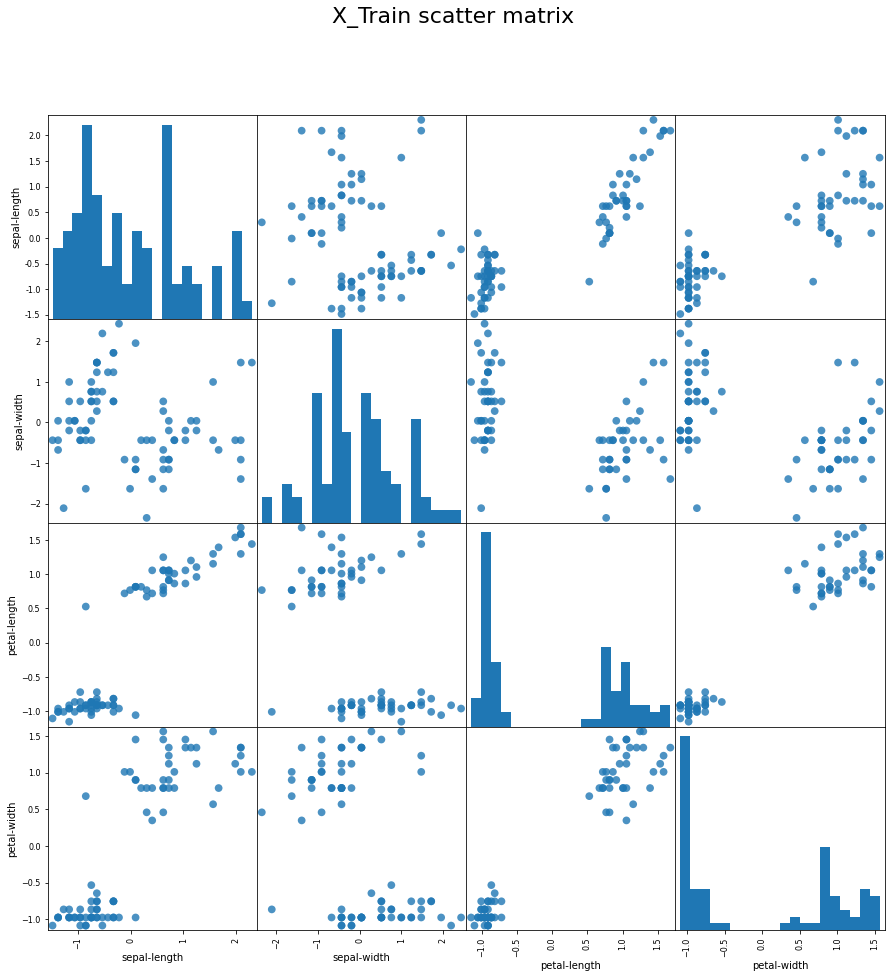

In [ ]:
#Scatterplot (test & train)
import matplotlib.pyplot as plt
import numpy as np

grr=pd.plotting.scatter_matrix(pd.DataFrame(X_train, columns=columns[:4]),figsize=(15,15),marker="o",hist_kwds={'bins':20},s=60,alpha=.8)
plt.suptitle('X_Train scatter matrix', fontsize=22)

Text(0.5, 0.98, 'X_Test scatter matrix')

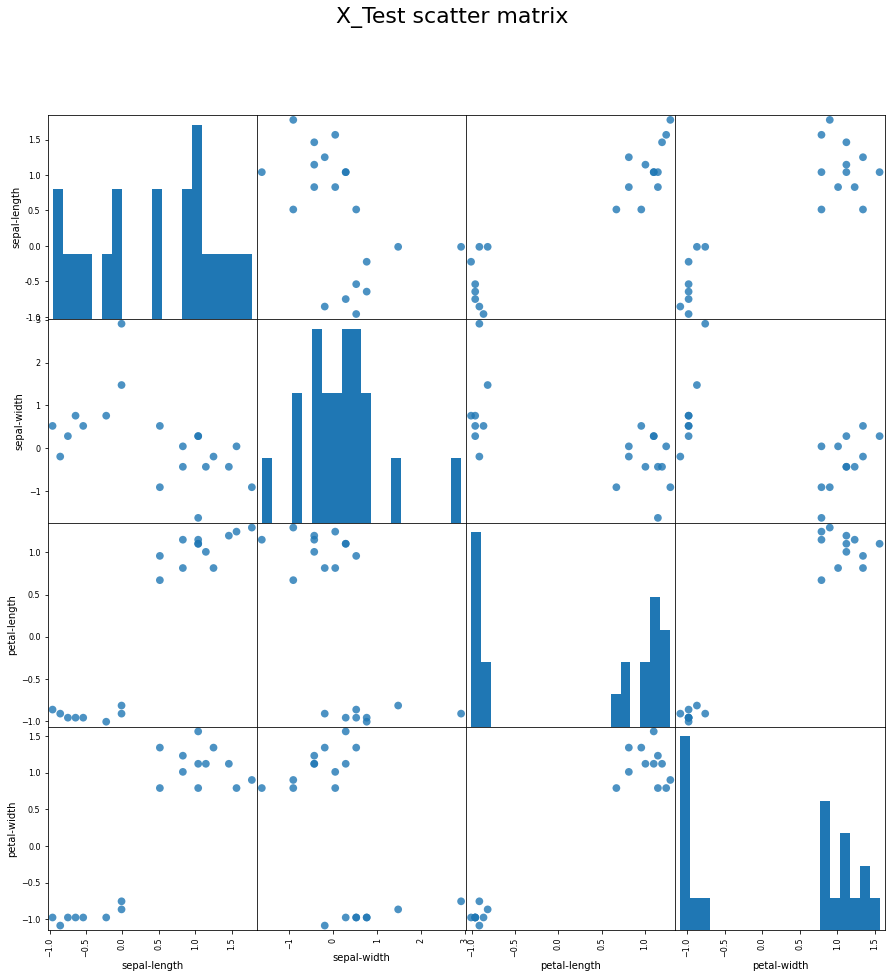

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

grr=pd.plotting.scatter_matrix(pd.DataFrame(X_test, columns=columns[:4]),figsize=(15,15),marker="o",hist_kwds={'bins':20},s=60,alpha=.8)
plt.suptitle('X_Test scatter matrix', fontsize=22)

## K-Neighbours model

### Fit model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model_neighbours = KNeighborsClassifier()
model_neighbours.fit(X_train, y_train)

KNeighborsClassifier()

### Report

                precision    recall  f1-score   support

   Iris-setosa       1.00      1.00      1.00         8
Iris-virginica       1.00      1.00      1.00        12

      accuracy                           1.00        20
     macro avg       1.00      1.00      1.00        20
  weighted avg       1.00      1.00      1.00        20



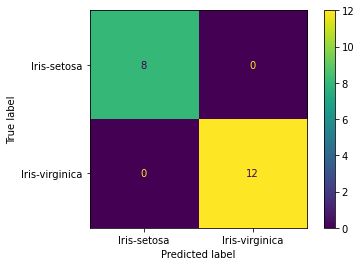

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = model_neighbours.predict(X_test)
#print(confusion_matrix(y_test, y_pred))
confm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=confm,display_labels=model_neighbours.classes_).plot()
print(classification_report(y_test, y_pred))

## Trees

### Fit model

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model_trees = DecisionTreeClassifier()
model_trees.fit(X_train, y_train)

DecisionTreeClassifier()

### Report

                precision    recall  f1-score   support

   Iris-setosa       1.00      1.00      1.00         8
Iris-virginica       1.00      1.00      1.00        12

      accuracy                           1.00        20
     macro avg       1.00      1.00      1.00        20
  weighted avg       1.00      1.00      1.00        20



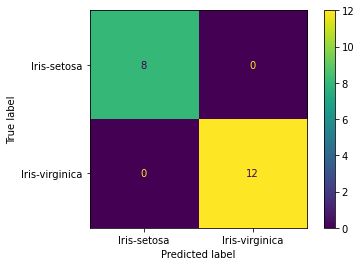

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred = model_trees.predict(X_test)
confm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=confm,display_labels=model_trees.classes_).plot()

print(classification_report(y_test, y_pred))